In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects

from highlight_text import ax_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import requests
from io import BytesIO

pd.set_option('display.max_columns', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [2]:
df = pd.read_csv(r"D:\FData\Serie_A_2024_25\till_gw12.csv")

# EPL

In [3]:
%%time

# Get unique players
unique_players = df['shortName'].unique()
# Initialize an empty dictionary to store players different type of pass counts
progress_counts = {'shortName': unique_players, 'Progressive_Passes': [], 'Progressive_Carry': [], 'team_names': []}

for name in unique_players:
    dfp = df[(df['shortName'] == name) & (df['outcomeType'] == 'Successful')]
    progress_counts['Progressive_Passes'].append(len(dfp[(dfp['x']>=35) & (~dfp['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (dfp['prog_pass'] > 9.144)]))
    progress_counts['Progressive_Carry'].append(len(dfp[(dfp['endX']>=35) & (dfp['prog_carry'] > 9.144)]))
    progress_counts['team_names'].append(dfp['teamName'].max())

progress_df = pd.DataFrame(progress_counts)
progress_df['total'] = progress_df['Progressive_Passes']+progress_df['Progressive_Carry']
progress_df = progress_df.sort_values(by='total', ascending=False)
progress_df.reset_index(drop=True, inplace=True)
progress_df = progress_df.head(10)

# progress_df

CPU times: total: 7.91 s
Wall time: 7.92 s


Text(0, 0.91, 'Data from: Opta | Till GW12, EPL 2024-25 | made by: @adnaaan433')

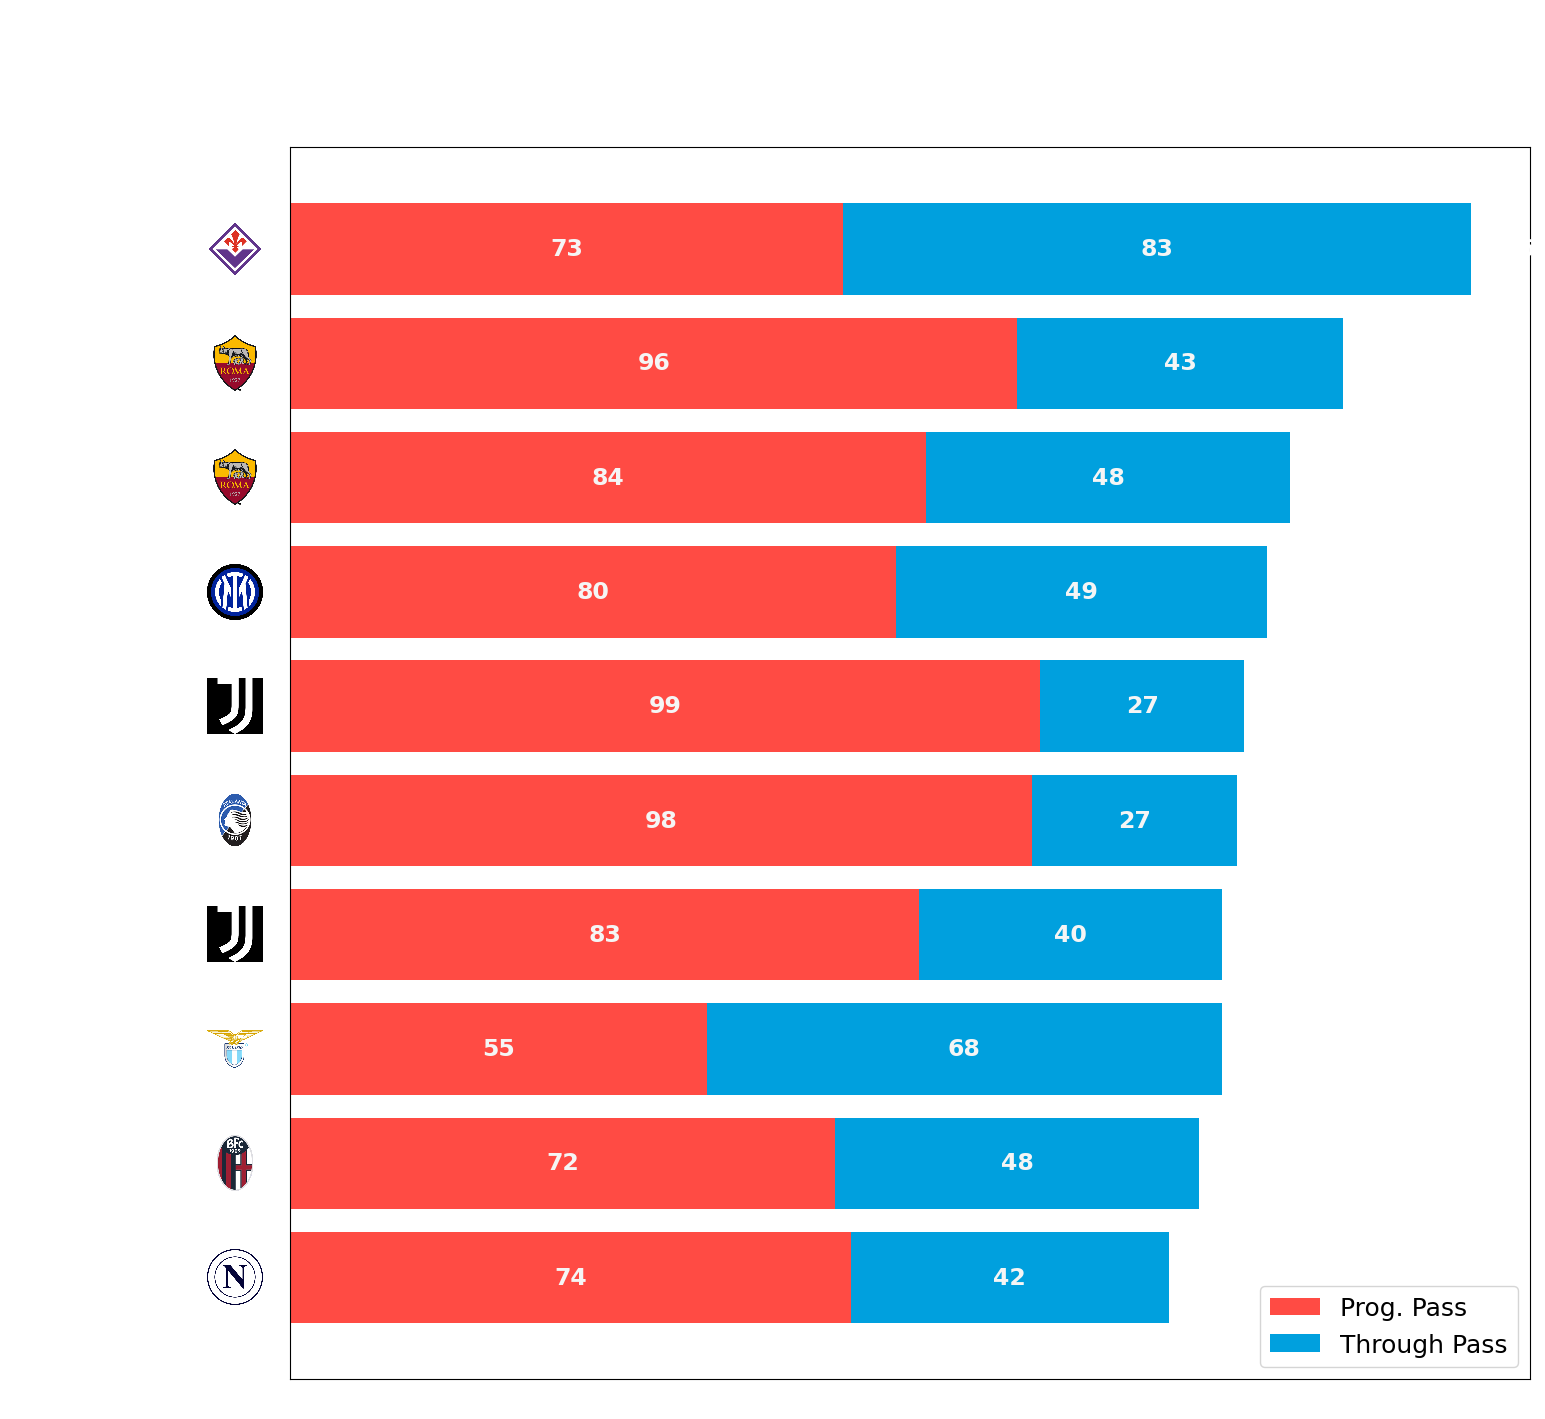

In [4]:
def passer_bar(ax):
    top10_progressors = progress_df.nsmallest(10, 'total')['shortName'].tolist()

    progressor_pp = progress_df.nsmallest(10, 'total')['Progressive_Passes'].tolist()
    progressor_pc = progress_df.nsmallest(10, 'total')['Progressive_Carry'].tolist()

    ax.barh(top10_progressors, progressor_pp, label='Prog. Pass', color=col1, left=0)
    ax.barh(top10_progressors, progressor_pc, label='Through Pass', color=col2, left=progressor_pp)

    # Add counts in the middle of the bars (if count > 0)
    for i, player in enumerate(top10_progressors):
        for j, count in enumerate([progressor_pp[i], progressor_pc[i]]):
            if count > 0:
                x_position = sum([progressor_pp[i], progressor_pc[i]][:j]) + count / 2
                ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=17, fontweight='bold')
        # Add total count at the end of the bar
        ax.text(progress_df['total'].iloc[i] + 2, 9-i, str(progress_df['total'].iloc[i]), ha='left', va='center', color='w', fontsize=17, fontweight='bold')
        # Plotting the logos
        for i, row in progress_df.iterrows():
            img = Image.open(f"D:\\FData\\club_teams_logo\\all_league\\{row['team_names']}.png")
            imagebox = OffsetImage(img, zoom=0.1)  # Adjust zoom as needed
            ab = AnnotationBbox(imagebox, (0, 9-i), frameon=False, xybox=(-40, 0), xycoords='data', boxcoords="offset points")
            ax.add_artist(ab)

    ax.set_facecolor('None')
    ax.tick_params(axis='x', colors='w', labelsize=15)
    ax.tick_params(axis='y', colors='w', labelsize=18, pad=75)
    ax.xaxis.label.set_color('k')
    ax.yaxis.label.set_color('k')
    # for spine in ax.spines.values():
    #   spine.set_edgecolor(bg_color)

    ax.legend(fontsize=18)

fig,ax = plt.subplots(figsize=(16,16), facecolor='None')
passer_bar(ax)

# # Set the overall title for the figure
fig.text(0, 0.94, "Top Open-Play Ball Progressors in EPL", color='w', fontsize=40, fontweight='bold', ha='left')
fig.text(0, 0.91, "Data from: Opta | Till GW12, EPL 2024-25 | made by: @adnaaan433", color='w', fontsize=20, ha='left')

# fig.savefig(f"D:\FData\LaLiga_2024_25\Analysis\OP_Ball_Progressors.png", bbox_inches='tight')

# LaLiga

In [ ]:
%%time

# Get unique players
unique_players = df['shortName'].unique()
# Initialize an empty dictionary to store players different type of pass counts
progress_counts = {'shortName': unique_players, 'Progressive_Passes': [], 'Progressive_Carry': [], 'team_names': []}

for name in unique_players:
    dfp = df[(df['shortName'] == name) & (df['outcomeType'] == 'Successful')]
    progress_counts['Progressive_Passes'].append(len(dfp[(dfp['x']>=35) & (~dfp['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (dfp['prog_pass'] > 9.144)]))
    progress_counts['Progressive_Carry'].append(len(dfp[(dfp['endX']>=35) & (dfp['prog_carry'] > 9.144)]))
    progress_counts['team_names'].append(dfp['teamName'].max())

progress_df = pd.DataFrame(progress_counts)
progress_df['total'] = progress_df['Progressive_Passes']+progress_df['Progressive_Carry']
progress_df = progress_df.sort_values(by='total', ascending=False)
progress_df.reset_index(drop=True, inplace=True)
progress_df = progress_df.head(10)

# progress_df

In [ ]:
def passer_bar(ax):
  top10_progressors = progress_df.nsmallest(10, 'total')['shortName'].tolist()

  progressor_pp = progress_df.nsmallest(10, 'total')['Progressive_Passes'].tolist()
  progressor_pc = progress_df.nsmallest(10, 'total')['Progressive_Carry'].tolist()

  ax.barh(top10_progressors, progressor_pp, label='Prog. Pass', color=col1, left=0)
  ax.barh(top10_progressors, progressor_pc, label='Through Pass', color=col2, left=progressor_pp)

  # Add counts in the middle of the bars (if count > 0)
  for i, player in enumerate(top10_progressors):
      for j, count in enumerate([progressor_pp[i], progressor_pc[i]]):
          if count > 0:
              x_position = sum([progressor_pp[i], progressor_pc[i]][:j]) + count / 2
              ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=17, fontweight='bold')
      # Add total count at the end of the bar
      ax.text(progress_df['total'].iloc[i] + 2, 9-i, str(progress_df['total'].iloc[i]), ha='left', va='center', color='w', fontsize=17, fontweight='bold')
      # Plotting the logos
      for i, row in progress_df.iterrows():
          img = Image.open(f"D:\\FData\\club_teams_logo\\all_league\\{row['team_names']}.png")
          imagebox = OffsetImage(img, zoom=0.1)  # Adjust zoom as needed
          ab = AnnotationBbox(imagebox, (0, 9-i), frameon=False, xybox=(-40, 0), xycoords='data', boxcoords="offset points")
          ax.add_artist(ab)

  # max_x = top10_progressors['total'].iloc()[0]
  # x_coord = [2 * i for i in range(1, int(max_x/2))]
  # for x in x_coord:
  #     ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

  ax.set_facecolor('None')
  ax.tick_params(axis='x', colors='w', labelsize=15)
  ax.tick_params(axis='y', colors='w', labelsize=18, pad=75)
  ax.xaxis.label.set_color('k')
  ax.yaxis.label.set_color('k')
  # for spine in ax.spines.values():
  #   spine.set_edgecolor(bg_color)

  ax.legend(fontsize=18)

fig,ax = plt.subplots(figsize=(16,16), facecolor='None')
passer_bar(ax)

# # Set the overall title for the figure
fig.text(0, 0.94, "Top Open-Play Ball Progressors in LaLiga", color='w', fontsize=40, fontweight='bold', ha='left')
fig.text(0, 0.91, "Data from: Opta | Till GW12, LaLiga 2024-25 | made by: @adnaaan433", color='w', fontsize=20, ha='left')

# fig.savefig(f"D:\FData\LaLiga_2024_25\Analysis\OP_Ball_Progressors.png", bbox_inches='tight')

# Serie A

In [8]:
%%time

# Get unique players
unique_players = df['shortName'].unique()
# Initialize an empty dictionary to store players different type of pass counts
progress_counts = {'shortName': unique_players, 'Progressive_Passes': [], 'Progressive_Carry': [], 'team_names': []}

for name in unique_players:
    dfp = df[(df['shortName'] == name) & (df['outcomeType'] == 'Successful')]
    progress_counts['Progressive_Passes'].append(len(dfp[(dfp['x']>=35) & (~dfp['qualifiers'].str.contains('Corner|Freekick|ThrowIn')) & (dfp['prog_pass'] > 9.144)]))
    progress_counts['Progressive_Carry'].append(len(dfp[(dfp['endX']>=35) & (dfp['prog_carry'] > 9.144)]))
    progress_counts['team_names'].append(dfp['teamName'].max())

progress_df = pd.DataFrame(progress_counts)
progress_df['total'] = progress_df['Progressive_Passes']+progress_df['Progressive_Carry']
progress_df = progress_df.sort_values(by='total', ascending=False)
progress_df.reset_index(drop=True, inplace=True)
progress_df = progress_df.head(10)

# progress_df

CPU times: total: 8.09 s
Wall time: 8.1 s


Text(0, 0.91, 'Data from: Opta | Till GW12, Serie A 2024-25 | made by: @adnaaan433')

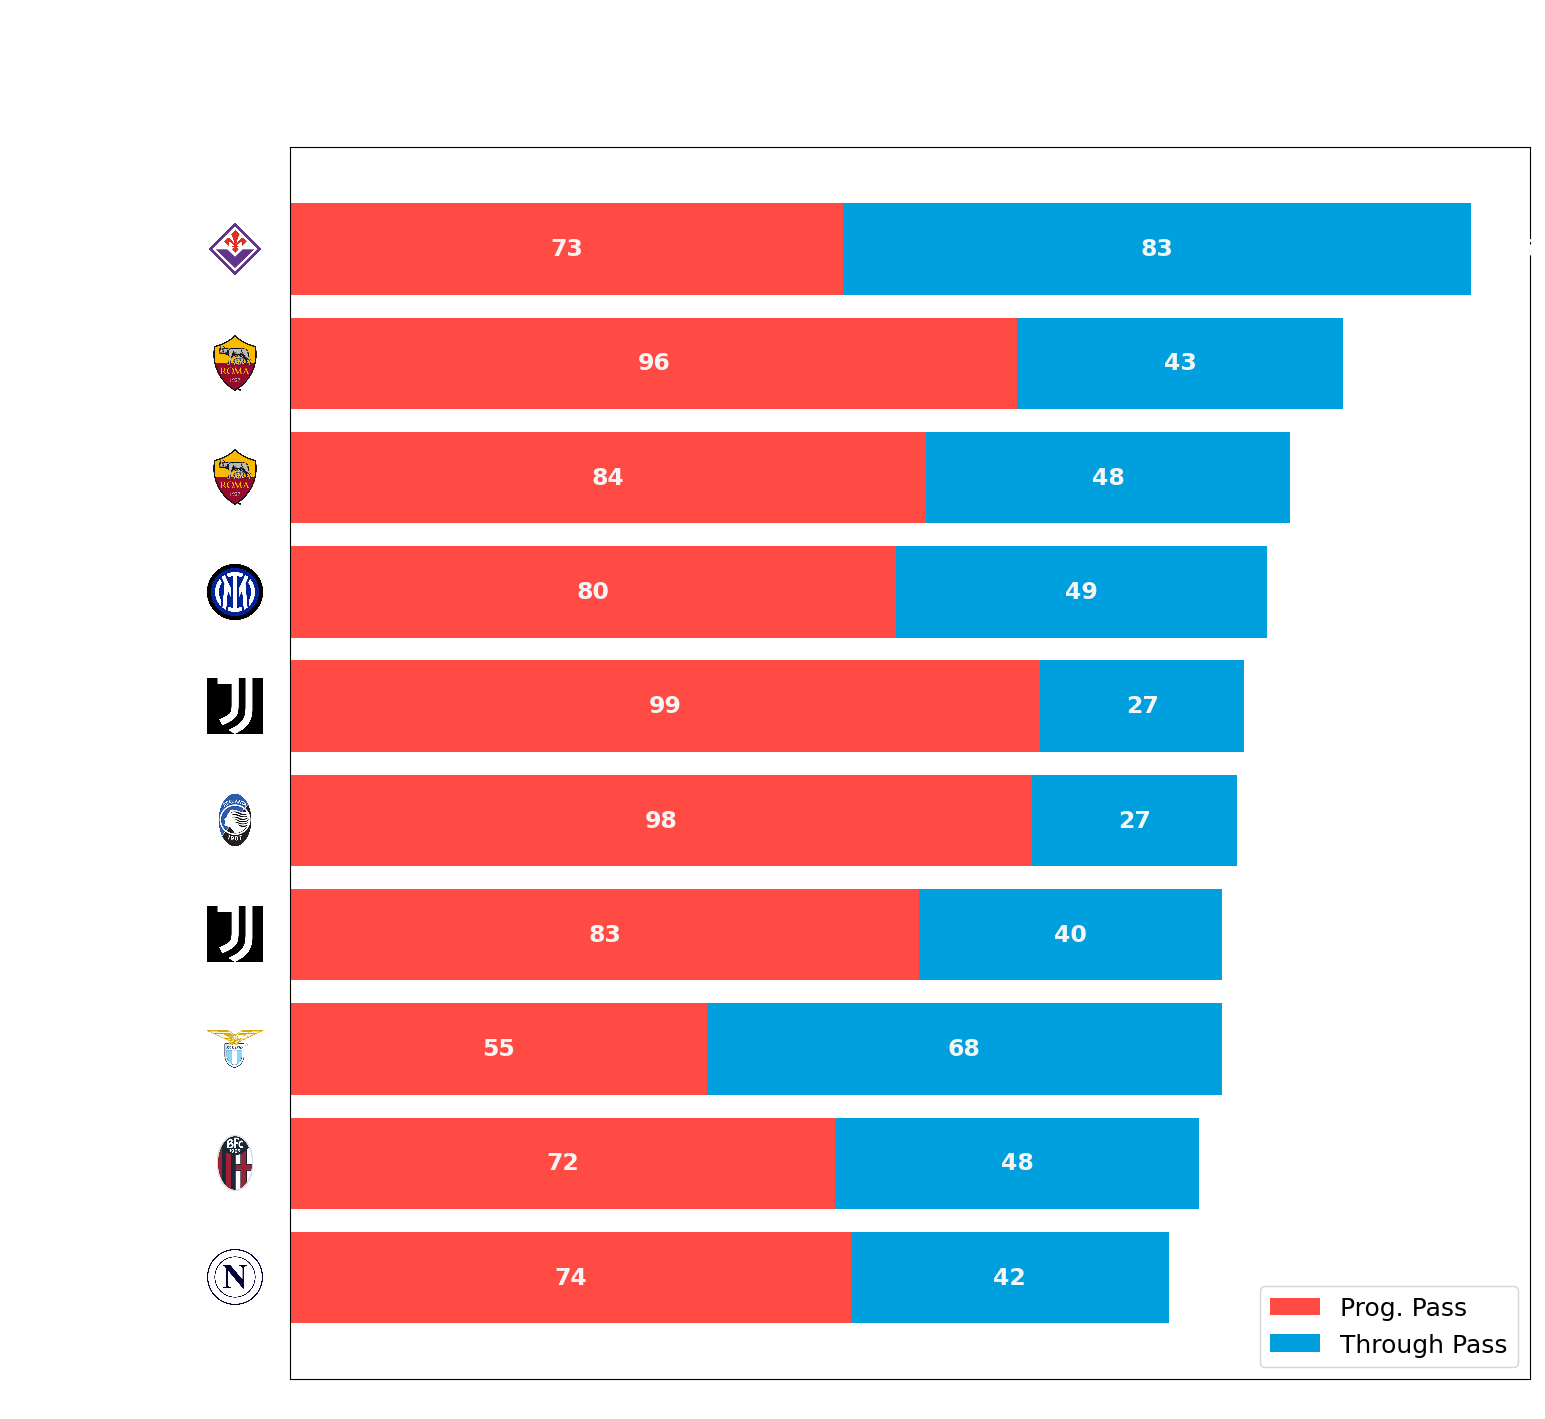

In [7]:
def passer_bar(ax):
  top10_progressors = progress_df.nsmallest(10, 'total')['shortName'].tolist()

  progressor_pp = progress_df.nsmallest(10, 'total')['Progressive_Passes'].tolist()
  progressor_pc = progress_df.nsmallest(10, 'total')['Progressive_Carry'].tolist()

  ax.barh(top10_progressors, progressor_pp, label='Prog. Pass', color=col1, left=0)
  ax.barh(top10_progressors, progressor_pc, label='Through Pass', color=col2, left=progressor_pp)

  # Add counts in the middle of the bars (if count > 0)
  for i, player in enumerate(top10_progressors):
      for j, count in enumerate([progressor_pp[i], progressor_pc[i]]):
          if count > 0:
              x_position = sum([progressor_pp[i], progressor_pc[i]][:j]) + count / 2
              ax.text(x_position, i, str(count), ha='center', va='center', color=bg_color, fontsize=17, fontweight='bold')
      # Add total count at the end of the bar
      ax.text(progress_df['total'].iloc[i] + 2, 9-i, str(progress_df['total'].iloc[i]), ha='left', va='center', color='w', fontsize=17, fontweight='bold')
      # Plotting the logos
      for i, row in progress_df.iterrows():
          img = Image.open(f"D:\\FData\\club_teams_logo\\all_league\\{row['team_names']}.png")
          imagebox = OffsetImage(img, zoom=0.1)  # Adjust zoom as needed
          ab = AnnotationBbox(imagebox, (0, 9-i), frameon=False, xybox=(-40, 0), xycoords='data', boxcoords="offset points")
          ax.add_artist(ab)

  # max_x = top10_progressors['total'].iloc()[0]
  # x_coord = [2 * i for i in range(1, int(max_x/2))]
  # for x in x_coord:
  #     ax.axvline(x=x, color='gray', linestyle='--', zorder=2, alpha=0.5)

  ax.set_facecolor('None')
  ax.tick_params(axis='x', colors='w', labelsize=15)
  ax.tick_params(axis='y', colors='w', labelsize=18, pad=75)
  ax.xaxis.label.set_color('k')
  ax.yaxis.label.set_color('k')
  # for spine in ax.spines.values():
  #   spine.set_edgecolor(bg_color)

  ax.legend(fontsize=18)

fig,ax = plt.subplots(figsize=(16,16), facecolor='None')
passer_bar(ax)

# # Set the overall title for the figure
fig.text(0, 0.94, "Top Open-Play Ball Progressors in Serie A", color='w', fontsize=40, fontweight='bold', ha='left')
fig.text(0, 0.91, "Data from: Opta | Till GW12, Serie A 2024-25 | made by: @adnaaan433", color='w', fontsize=20, ha='left')

# fig.savefig(f"D:\FData\LaLiga_2024_25\Analysis\OP_Ball_Progressors.png", bbox_inches='tight')